In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
  iris_data.data,
  iris_data.target,
  test_size=0.2,
  random_state=11
)

# 결정 트리 모델 생성

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
# decision tree는 지니계수를 최소화할 수 있는 속성을 학습

DecisionTreeClassifier()

# Graphviz 시각화
- Tree모델이 어떻게 했는가를 시각화하기 위한 도구

In [4]:
from sklearn.tree import export_graphviz

In [5]:
export_graphviz(
    dt_clf, # 시각화할 모델 (훈련된 모델)
    out_file='tree.dot', # 시각화 결과물 파일 경로
    class_names= iris_data.target_names, # 각 클래스의 문자열 이름
    feature_names = iris_data.feature_names, # 각 특성(feature)의 이름
    impurity = True,
    filled = True)

Defaulting to user installation because normal site-packages is not writeable
Name: graphviz
Version: 0.20.1
Summary: Simple Python interface for Graphviz
Home-page: https://github.com/xflr6/graphviz
Author: Sebastian Bank
Author-email: sebastian.bank@uni-leipzig.de
License: MIT
Location: c:\users\jeeyeon kim\appdata\roaming\python\python39\site-packages
Requires: 
Required-by: 


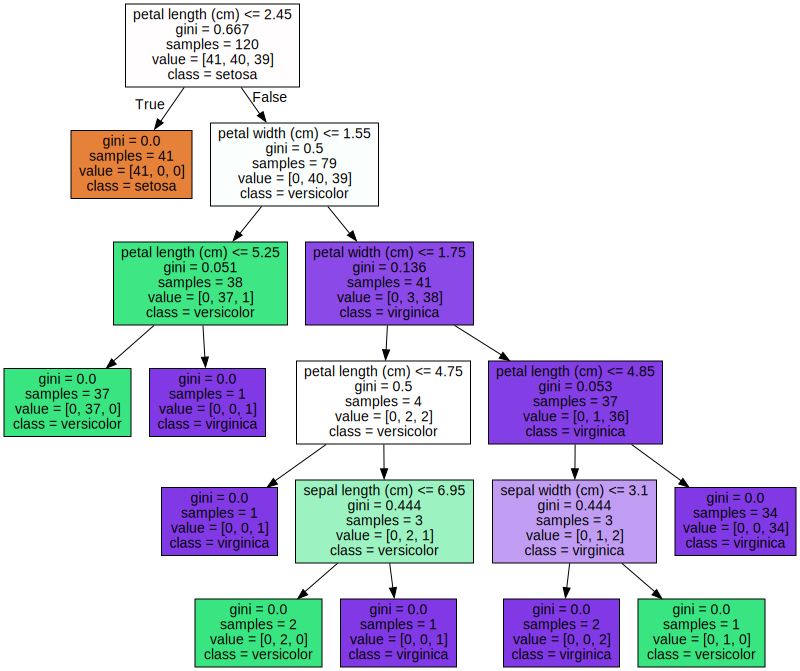

In [6]:
!pip install graphviz
!pip show graphviz
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

# 정확도 확인

In [8]:
from sklearn.metrics import accuracy_score

train_pred = dt_clf.predict(X_train) # 알고 있는 데이터에 대한 예측
test_pred = dt_clf.predict(X_test) #새로 보는 데이터에 대한 예측

print('훈련 세트에 대한 점수: {:.3f}'.format(accuracy_score(y_train, train_pred)))
print('테스트 세트에 대한 점수: {:.3f}'.format(accuracy_score(y_test, test_pred)))

훈련 세트에 대한 점수: 1.000
테스트 세트에 대한 점수: 0.933


- 훈련세트 점수 1?? 과대적합!!! --> max_depth를 이용해서 과대적합 해결

# max_depth를 이용한 질문의 깊이 제어

In [7]:
dt_clf_depth_2 = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

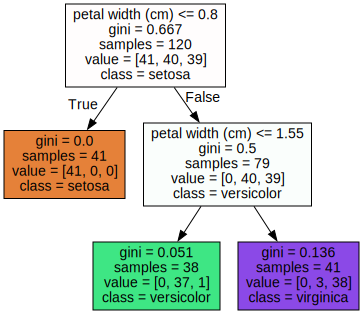

In [8]:
export_graphviz(
    dt_clf_depth_2, # 시각화할 모델
    out_file="tree.dot", # 시각화 결과물 파일 경로
    class_names=iris_data.target_names, # 각 클래스의 문자열 이름
    feature_names=iris_data.feature_names, # 각 특성(feature)의 이름
    impurity=True,
    filled=True
)

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [11]:
train_pred = dt_clf_depth_2.predict(X_train) # 알고 있는 데이터에 대한 예측
test_pred  = dt_clf_depth_2.predict(X_test)  # 새로 보는 데이터에 대한 예측

print("훈련 세트에 대한 점수 : {:.3f}".format(accuracy_score(y_train, train_pred)))
print("테스트 세트에 대한 점수 : {:.3f}".format(accuracy_score(y_test, test_pred)))

훈련 세트에 대한 점수 : 0.967
테스트 세트에 대한 점수 : 0.867


# 샘플 데이터 생성

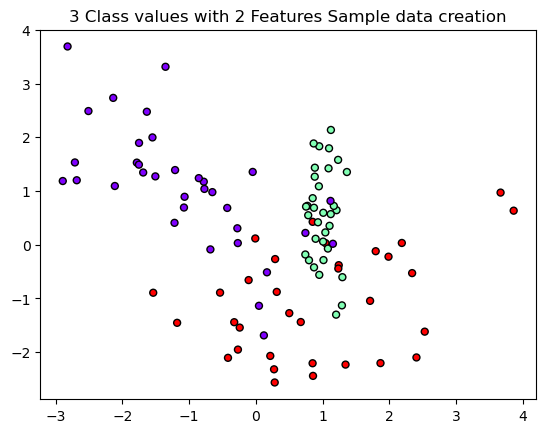

In [13]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=0
)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(
    X_features[:, 0],
    X_features[:, 1],
    marker='o',
    c=y_labels,
    s=25, 
    cmap='rainbow',
    edgecolor='k'
)
plt.show()

In [14]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

 # 기본 결정 트리 확인

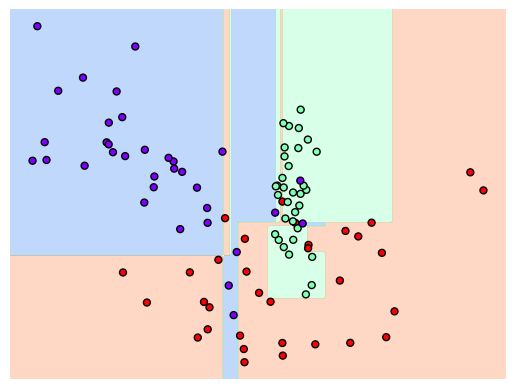

In [15]:
from sklearn.tree import DecisionTreeClassifier

# 하이퍼 파라미터를 이용해 복잡도를 조절하지 않은 의사결정나무 모델은 항상 과대적합
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)

visualize_boundary(dt_clf, X_features, y_labels)

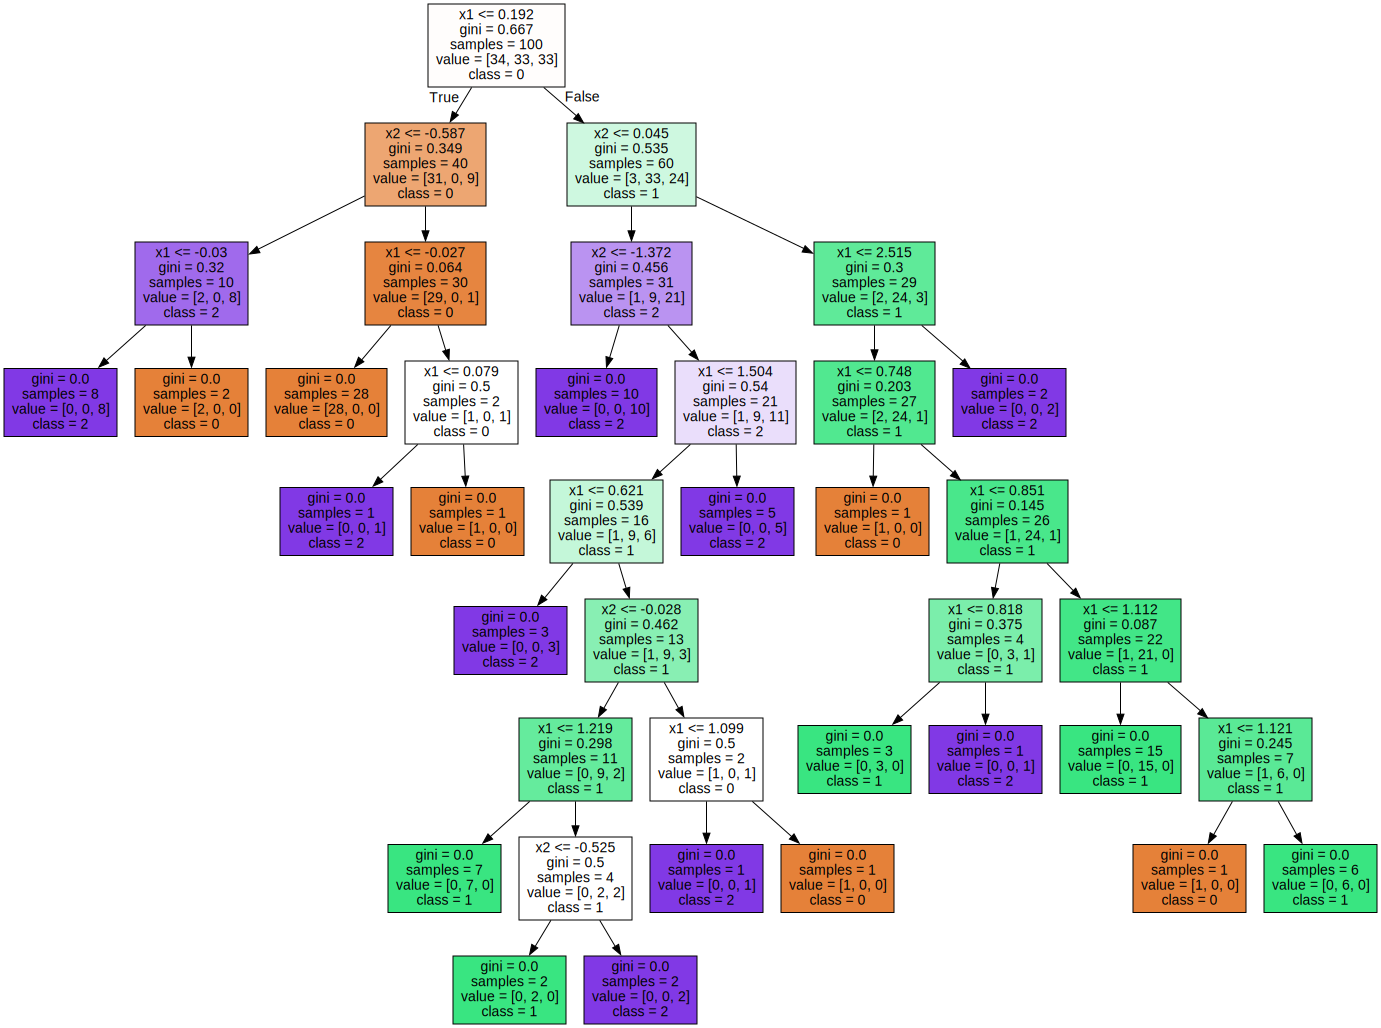

In [20]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## max_depth 조절하기

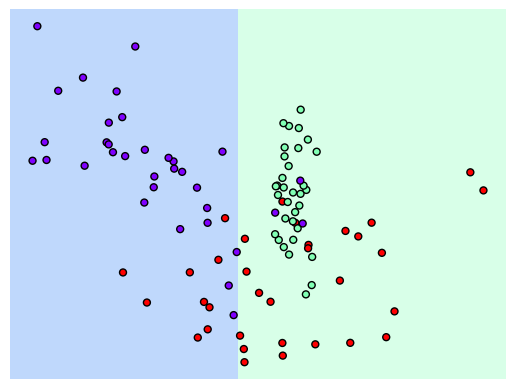

In [23]:
from sklearn.tree import DecisionTreeClassifier

# 나무의 최대 깊이 = 1
dt_clf = DecisionTreeClassifier(max_depth=1).fit(X_features, y_labels)

visualize_boundary(dt_clf, X_features, y_labels)

- underfitting (과소적합)

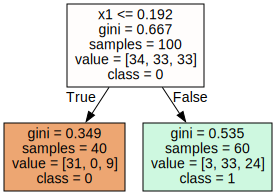

In [24]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

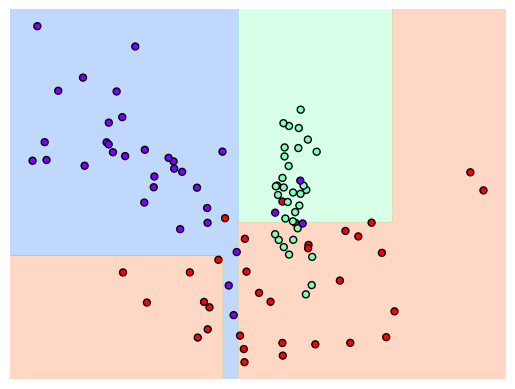

In [28]:
from sklearn.tree import DecisionTreeClassifier

# 나무의 최대 깊이 = 3
dt_clf = DecisionTreeClassifier(max_depth=3).fit(X_features, y_labels)

visualize_boundary(dt_clf, X_features, y_labels)

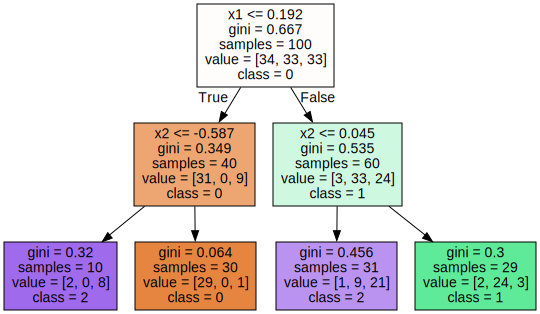

In [27]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## min_samples_split

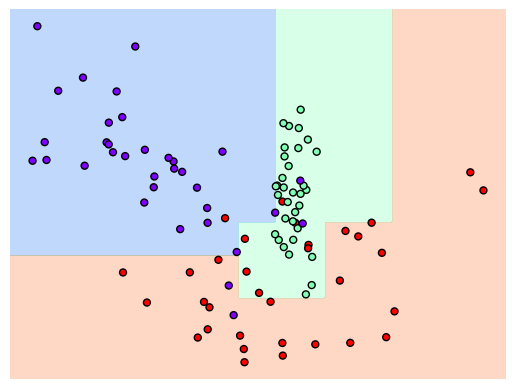

In [42]:
dt_clf = DecisionTreeClassifier(min_samples_split=20).fit(X_features, y_labels)

visualize_boundary(dt_clf, X_features, y_labels)

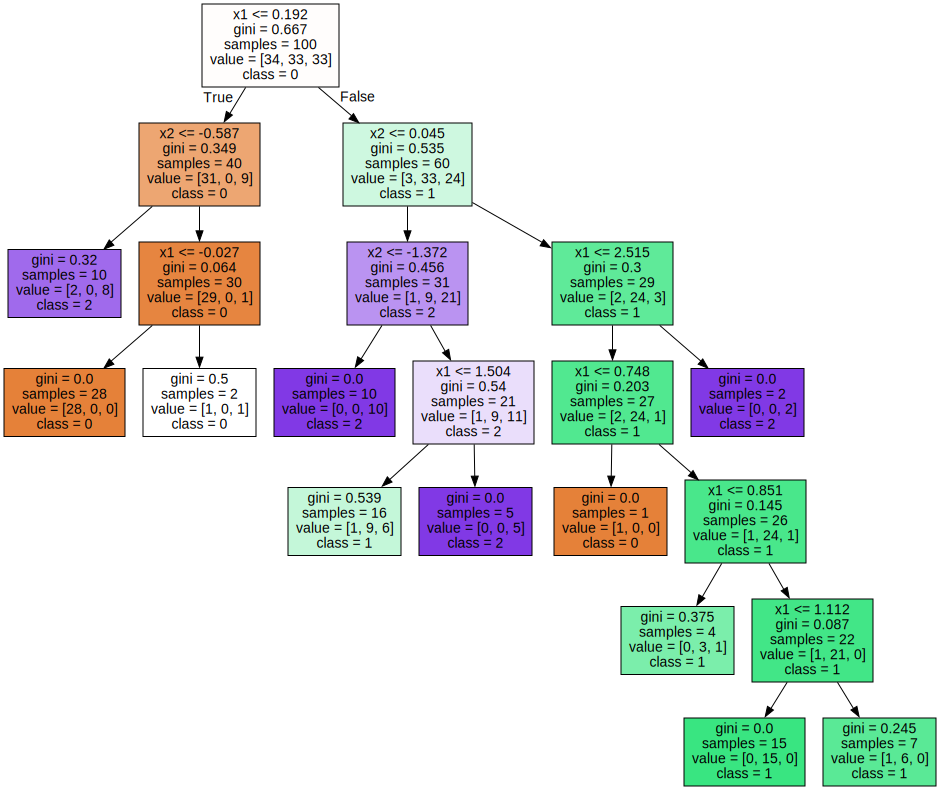

In [43]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## min_samples_leaf
- split했을 때 내가 지정한 수보다 적게 갖고 있으면 더 이상 자르지 않음.
- 잘리고 나서 갖고 있어야 할 최소 샘플 개수

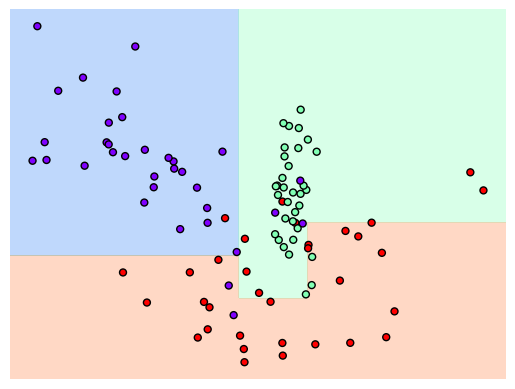

In [44]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=7).fit(X_features, y_labels)

visualize_boundary(dt_clf, X_features, y_labels)

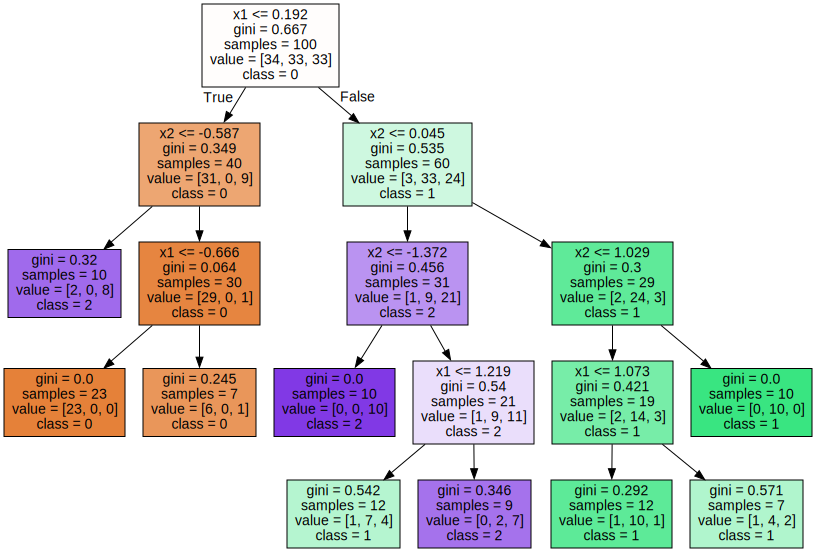

In [45]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 특성 중요도

In [57]:
dt_clf_iris = DecisionTreeClassifier().fit(X_train,y_train)
dt_clf_iris.feature_importances_

array([0.01667014, 0.00833507, 0.55490281, 0.42009198])

In [61]:
dt_clf_iris.n_features_in_

4

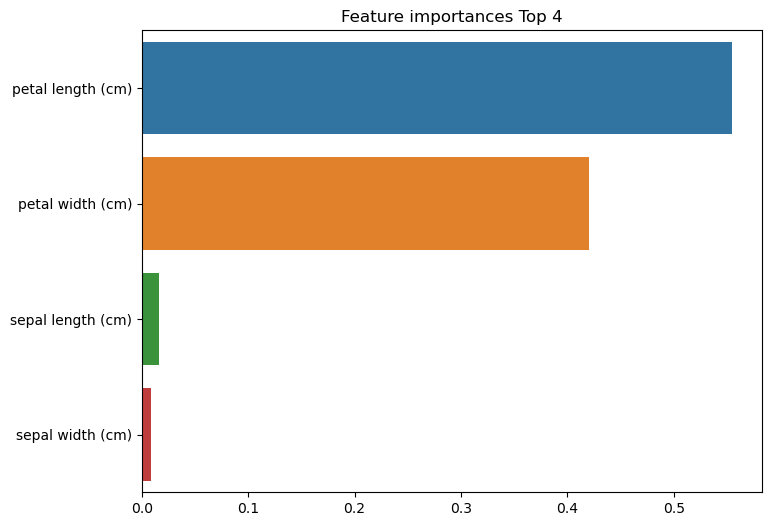

In [59]:
import pandas as pd
def plot_feature_importance(model, columns, limit=None):
    import seaborn as sns

    ftr_importances_values = model.feature_importances_
    # Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
    ftr_importances = pd.Series(ftr_importances_values, index=columns  )
    # 중요도값 순으로 Series를 정렬
    ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
    plt.figure(figsize=(8,6))
    plt.title(f'Feature importances Top {len(columns) if limit == None else limit}')
    sns.barplot(x=ftr_top , y = ftr_top.index)
    plt.show()

plot_feature_importance(dt_clf_iris, iris_data.feature_names)

In [63]:
import seaborn as sns

iris_df = pd.DataFrame(data = iris_data.data, columns = iris_data.feature_names)
iris_df['target'] = iris_data.target

iris_df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


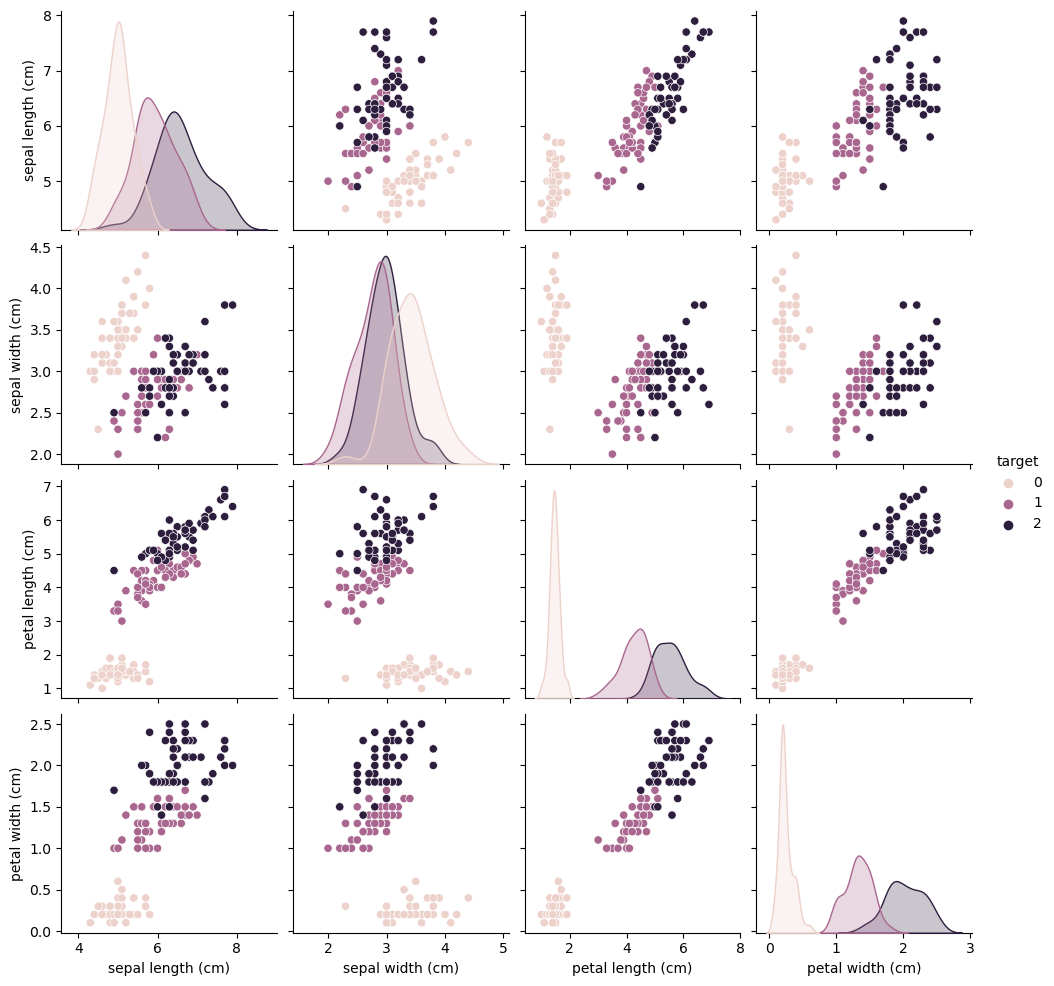

In [66]:
sns.pairplot(iris_df,hue='target',height=2.5)